In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import scipy.io as sio
import os
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
from sklearn import preprocessing

In [2]:
clf_names = ["Nearest Neighbors", 
#              "Linear SVM", 
#              "RBF SVM", 
             "Gaussian Process",
             "Decision Tree", 
             "Random Forest", 
             "Neural Net", 
             "AdaBoost",
             "Naive Bayes", 
             "QDA"]
classifiers = [
    KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [3]:
def print_top_features(clf, top_k=10, feature_names = []):
    """Prints features with the highest coefficient values, per class"""
#     feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        print clf.coef_
        top_features_idx = np.argsort(clf.coef_[i])[-top_k:]
        if feature_names == []:
            print("{}:{}".format(class_label, top_features_idx))
        else:
            print("%s: %s" % (class_label,
                  " ".join(feature_names[j] for j in top_features_idx)))

In [4]:
def plot_important_features(features, clf, feature_name_list=[], num_selected_features=50):
    importances = clf.feature_importances_
    X = np.array(features)
    std = np.std([tree.feature_importances_ for tree in clf.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(0,num_selected_features):
        if feature_name_list == []:
            print("%d, (%f)" % (f + 1, importances[indices[f]]))
        else:
            print("%d. feature %s (%f)" % (f + 1, feature_name_list[indices[f]], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(num_selected_features), importances[indices[:num_selected_features]],
           color="r", yerr=std[indices[:num_selected_features]], align="center")
    plt.xticks(range(num_selected_features), indices[:num_selected_features])
    plt.xlim([-1, num_selected_features])
    plt.show()

In [5]:
def run_experiments(X, Y, feature_name_list=[], top_k=50):
    # iterate over classifiers
    '''
    print('Accuracy of different classifier, without Normalization')
    for name, clf in zip(clf_names, classifiers):
        scores = cross_val_score(clf, X, Y, cv=5)
        print("{}, {}/{}".format(name, np.mean(scores), np.std(scores)))
    
    adaboost_clf = AdaBoostClassifier()
    adaboost_clf.fit(X, Y)
    plot_important_features(X, adaboost_clf, feature_name_list, 50)
    '''
    
    print('Accuracy of different classifier, with Normalization')
    normalization_methods_name = ['StandardScaler', 'Normalizer']#, 'RobustScaler'
    normalization_methods = [StandardScaler(), Normalizer()]#, RobustScaler(),
    # iterate over classifiers
    for name, clf in zip(clf_names, classifiers):
        print('\n')
        for norm_name, norm in zip(normalization_methods_name, normalization_methods):
            scores = cross_val_score((make_pipeline(norm, clf)), X, Y, cv=5)
            print("{},{}, {}/{}".format(name, norm_name, np.mean(scores), np.std(scores)))
    
    print('\nStandard Scaled AdaBoostClassifier')
    X_scaled = preprocessing.scale(X)
#     scaled_adaboost_clf = make_pipeline(StandardScaler(), AdaBoostClassifier())
    clf = AdaBoostClassifier()
    clf.fit(X_scaled, Y)
    plot_important_features(X_scaled, clf, feature_name_list, top_k)
    

# prepare data into libsvm format

###############################################

Data:csv4volume.csv

Accuracy of different classifier, with Normalization


Nearest Neighbors,StandardScaler, 0.658864666354/0.0403037366574
Nearest Neighbors,Normalizer, 0.711216596343/0.0493714448307


Gaussian Process,StandardScaler, 0.663834583529/0.0487992787729
Gaussian Process,Normalizer, 0.808694327239/0.0238889659066


Decision Tree,StandardScaler, 0.709024456946/0.0292787114017
Decision Tree,Normalizer, 0.642077668386/0.048434834024


Random Forest,StandardScaler, 0.66470659478/0.0831524117239
Random Forest,Normalizer, 0.661738943585/0.0169582437458




/usr/local/lib/python2.7/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Neural Net,StandardScaler, 0.808600171902/0.0203056800552
Neural Net,Normalizer, 0.813600953274/0.0192211792566


AdaBoost,StandardScaler, 0.751343959994/0.0194010079551
AdaBoost,Normalizer, 0.699211204876/0.0423779441683


Naive Bayes,StandardScaler, 0.778627910611/0.0314385812795
Naive Bayes,Normalizer, 0.746124003751/0.0280569756009


QDA,StandardScaler, 0.609327629317/0.0341378347237
QDA,Normalizer, 0.606826847945/0.0261424956937

Standard Scaled AdaBoostClassifier
Feature ranking:
1. feature 29 (0.060000)
2. feature 56 (0.060000)
3. feature 58 (0.060000)
4. feature 57 (0.040000)
5. feature 21 (0.040000)
6. feature 71 (0.040000)
7. feature 23 (0.040000)
8. feature 18 (0.040000)
9. feature 14 (0.040000)
10. feature 17 (0.020000)
11. feature 64 (0.020000)
12. feature 44 (0.020000)
13. feature 20 (0.020000)
14. feature 13 (0.020000)
15. feature 59 (0.020000)
16. feature 55 (0.020000)
17. feature 53 (0.020000)
18. feature 46 (0.020000)
19. feature 50 (0.020000)
20. feature 49 (0.020000

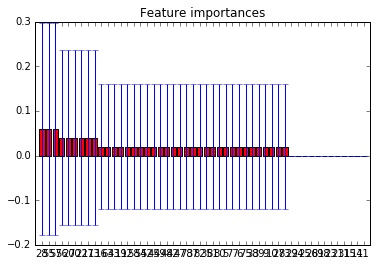

###############################################

Data:csv4network.csv

Accuracy of different classifier, with Normalization


Nearest Neighbors,StandardScaler, 0.599355368026/0.0238879914302
Nearest Neighbors,Normalizer, 0.535004297546/0.0364485951756


Gaussian Process,StandardScaler, 0.417896155649/0.00281046506521
Gaussian Process,Normalizer, 0.584603844351/0.00773818403305


Decision Tree,StandardScaler, 0.716620175027/0.0229155309557
Decision Tree,Normalizer, 0.584792155024/0.0257194264874


Random Forest,StandardScaler, 0.751250586029/0.0219132790077
Random Forest,Normalizer, 0.58463548992/0.0147417371988


Neural Net,StandardScaler, 0.641892483201/0.0221915635946
Neural Net,Normalizer, 0.619517502735/0.0605834282921


AdaBoost,StandardScaler, 0.755970464135/0.0380282254478
AdaBoost,Normalizer, 0.609235036724/0.0539172084943


Naive Bayes,StandardScaler, 0.527126113455/0.0661409362453
Naive Bayes,Normalizer, 0.554537427723/0.0574692390394




/usr/local/lib/python2.7/dist-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA,StandardScaler, 0.477497265198/0.0345313566933
QDA,Normalizer, 0.457433974058/0.061163526802

Standard Scaled AdaBoostClassifier
Feature ranking:
1. feature 81-31 (0.040000)
2. feature 23-16 (0.040000)
3. feature 71-9 (0.040000)
4. feature 10-8 (0.020000)
5. feature 58-3 (0.020000)
6. feature 85-55 (0.020000)
7. feature 90-12 (0.020000)
8. feature 42-9 (0.020000)
9. feature 85-48 (0.020000)
10. feature 67-45 (0.020000)
11. feature 90-58 (0.020000)
12. feature 48-41 (0.020000)
13. feature 67-6 (0.020000)
14. feature 89-51 (0.020000)
15. feature 88-45 (0.020000)
16. feature 77-75 (0.020000)
17. feature 16-15 (0.020000)
18. feature 51-4 (0.020000)
19. feature 82-49 (0.020000)
20. feature 87-20 (0.020000)
21. feature 66-15 (0.020000)
22. feature 89-57 (0.020000)
23. feature 74-71 (0.020000)
24. feature 13-9 (0.020000)
25. feature 54-46 (0.020000)
26. feature 56-28 (0.020000)
27. feature 68-58 (0.020000)
28. feature 39-6 (0.020000)
29. feature 3-2 (0.020000)
30. feature 66-46 (0.020000)

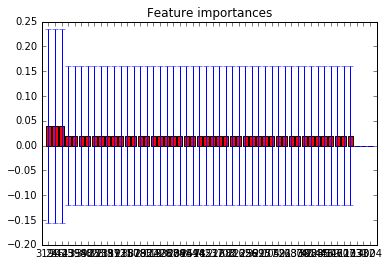

In [6]:
import numpy as np
import pandas as pd

data_file_list = ['csv4volume.csv', 'csv4network.csv']
data_path = "../data/res_controlVol/"
for data_file in data_file_list:
    print('###############################################\n')
    print('Data:{}\n'.format(data_file))
    # comma delimited is the default
    df = pd.read_csv(os.path.join(data_path, data_file), header = 0)

    # put the original column names in a python list
    original_headers = list(df.columns.values)
    feature_name_list = original_headers[1:]
    # remove the non-numeric columns
    df = df._get_numeric_data()

    # put the numeric column names in a python list
    numeric_headers = list(df.columns.values)

    # create a numpy array with the numeric values for input into scikit-learn
    numpy_array = np.array(df.as_matrix())
    Y = numpy_array[:,0]
    X = numpy_array[:,1:]
    run_experiments(X, Y, feature_name_list)